# **Dataset**

In [ ]:
import pandas as pd
  
df = pd.read_csv('heart.csv')
df
#HEART DISEASE 0 = Normal, 1 = Heart Disease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# **Exploratory Data Analysis**



In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Missing Data

In [ ]:
print(df.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Data Visualisation

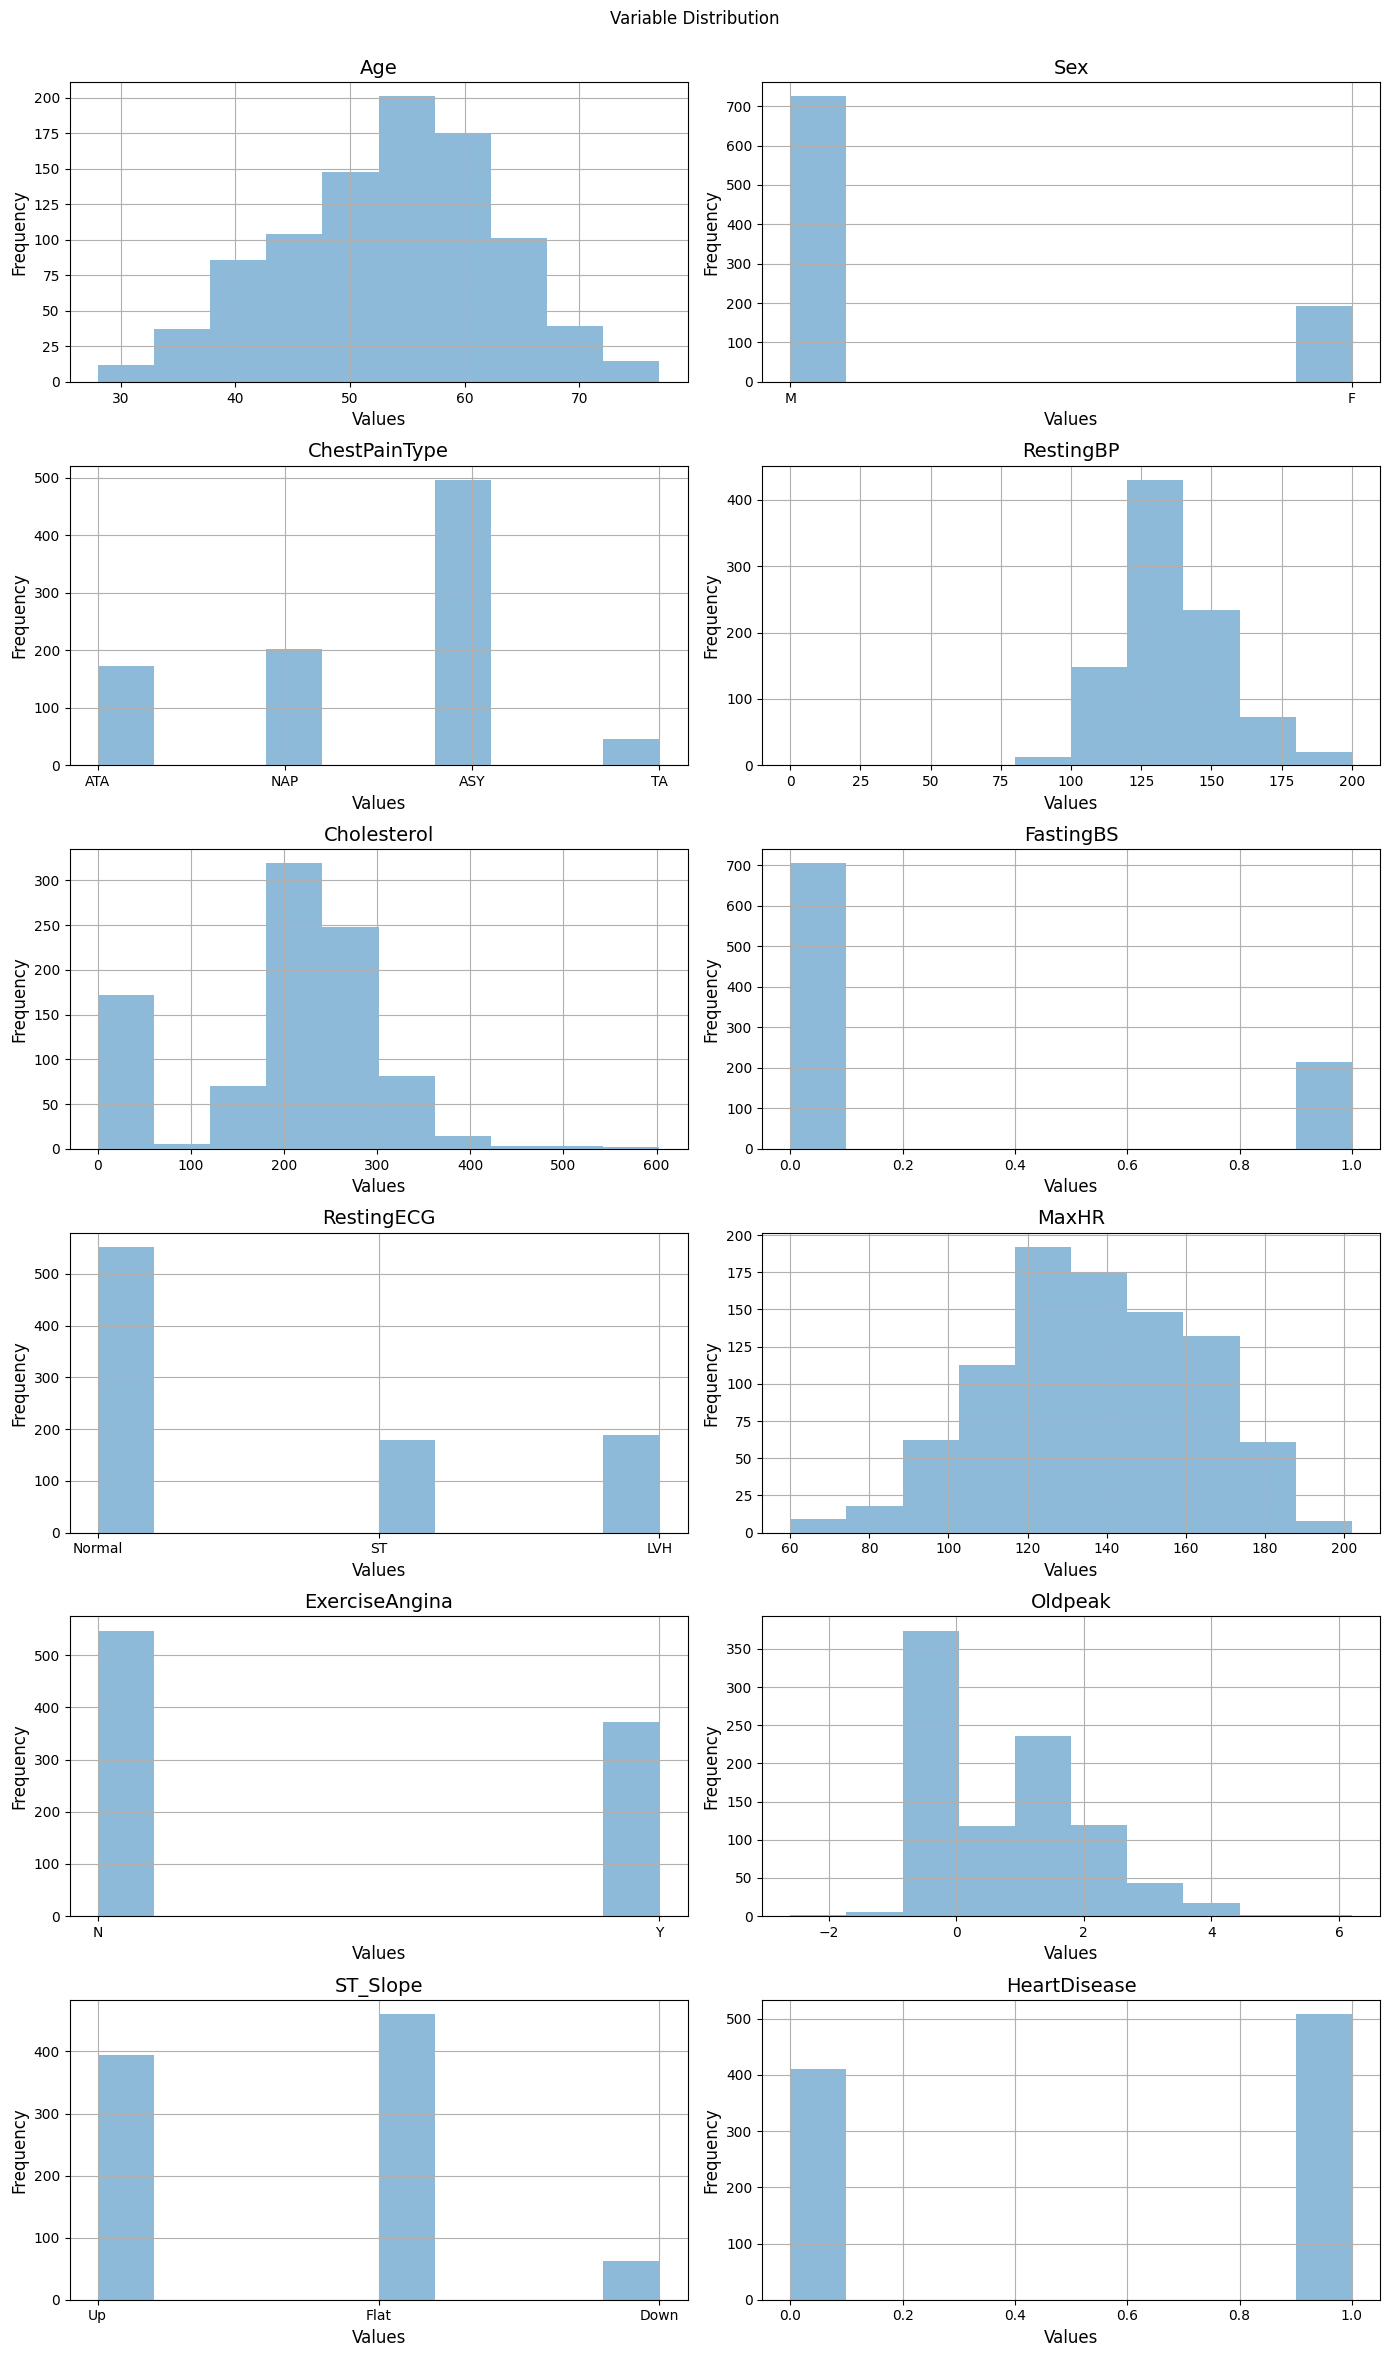

In [ ]:
list_columns = list(df.columns)

fig, axs = plt.subplots(6, 2, figsize=(14, 24))
fig.suptitle('Variable Distribution')

for i, column in enumerate(list_columns):
    ax = axs.flat[i]
    ax.hist(df[column], color = '#1f77b4', alpha = 0.5)
    ax.set_title(column, fontsize = 14)
    ax.set_xlabel('Values', fontsize = 12)
    ax.set_ylabel('Frequency', fontsize = 12)
    ax.grid(True)
    
plt.tight_layout()
plt.subplots_adjust(top = 0.95)

Outliers

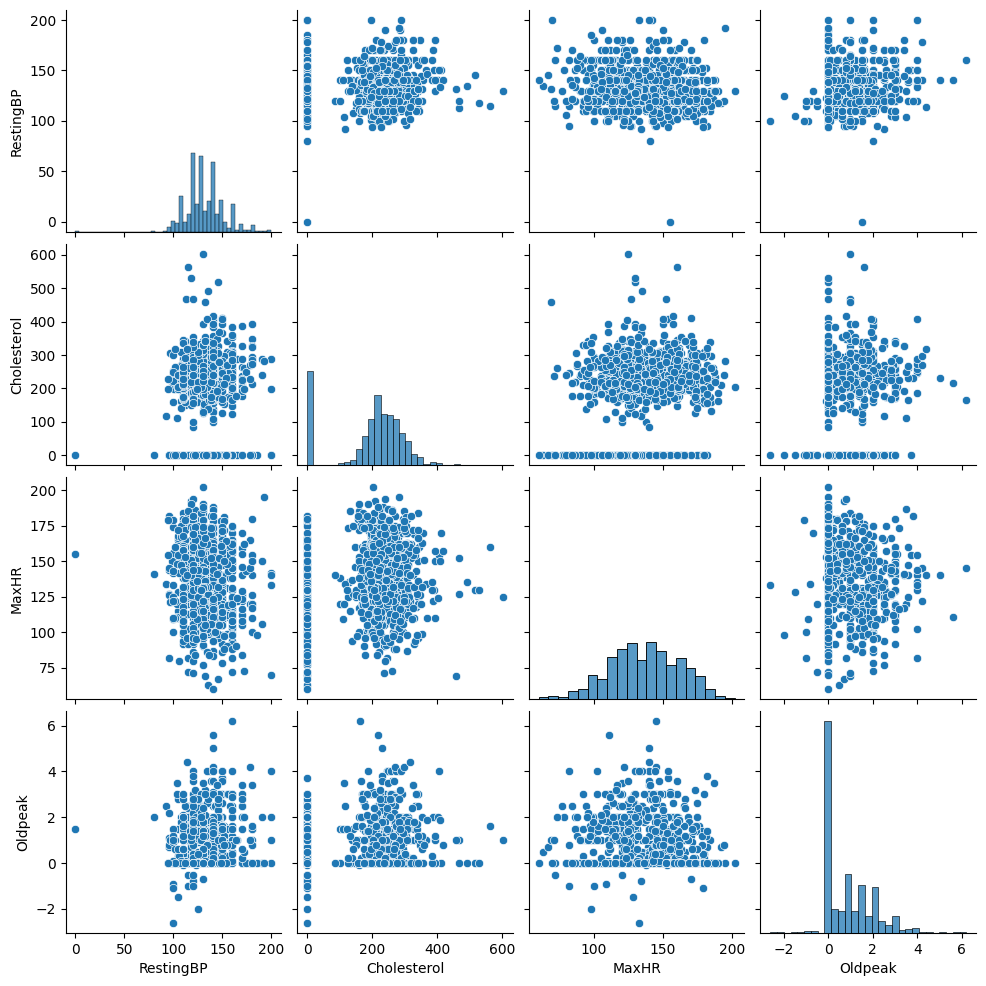

In [ ]:
continuous = df[['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

sns.pairplot(continuous)

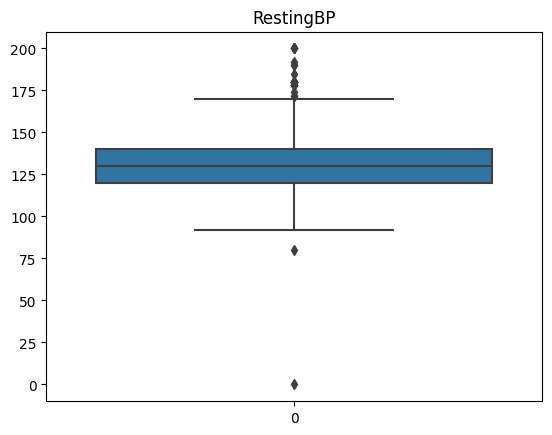

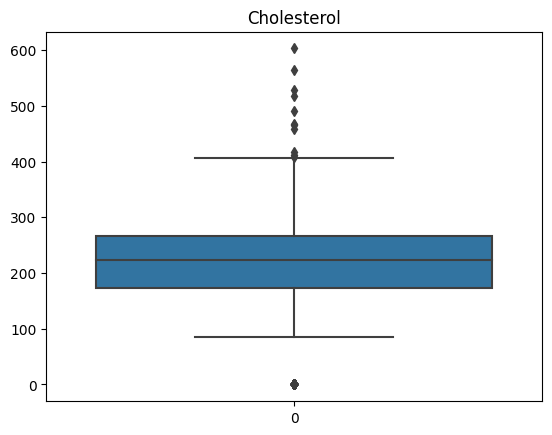

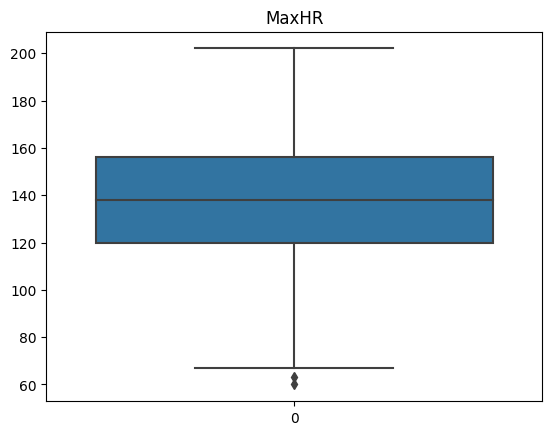

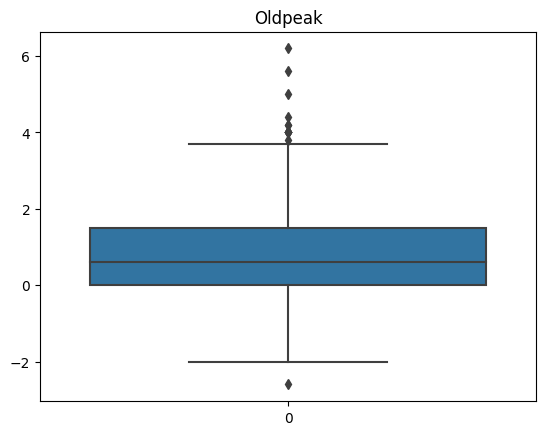

In [ ]:
for column in continuous:
    sns.boxplot(data = df[column])
    plt.title(column)
    plt.show()

In [ ]:
outliers = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for column in outliers:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower) & (df[column] <= upper)]

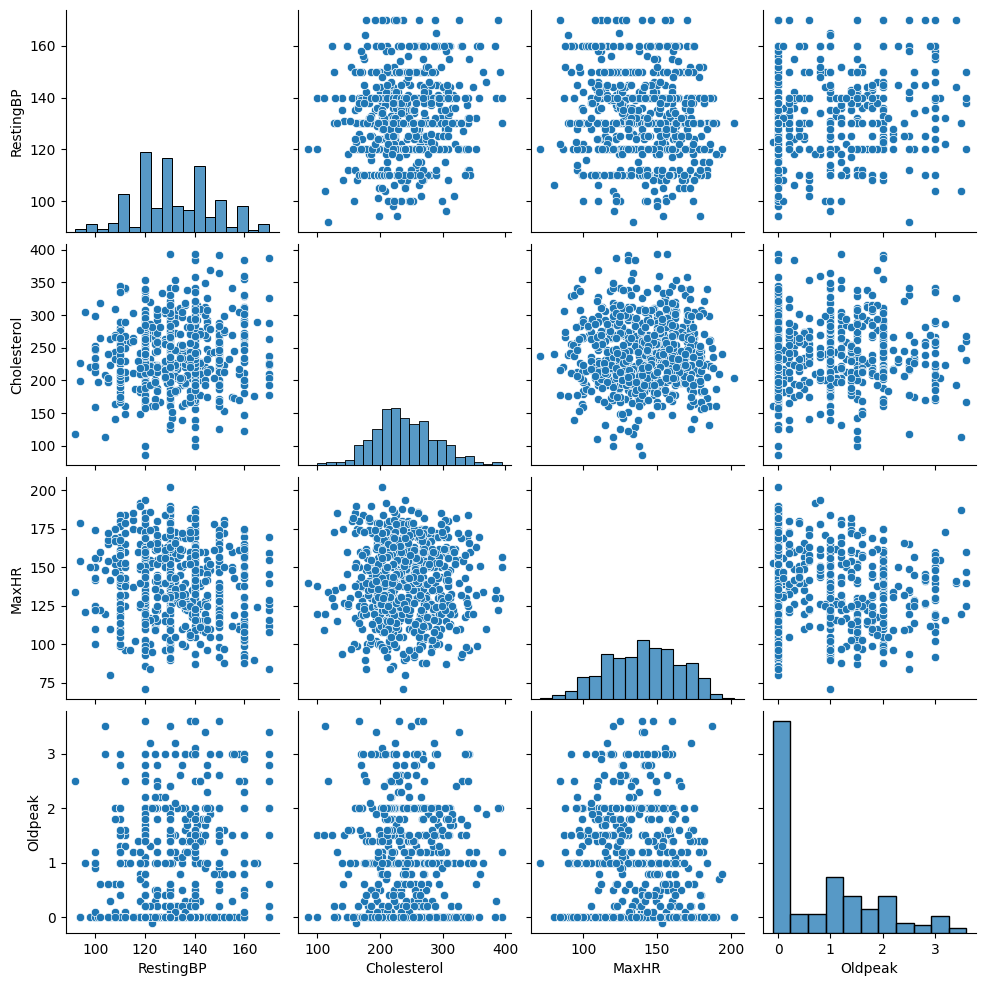

In [ ]:
sns.pairplot(df[outliers])

<Axes: >

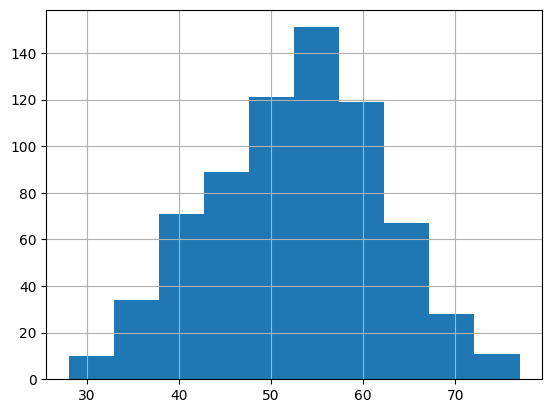

In [ ]:
df['Age'].hist()

<Axes: >

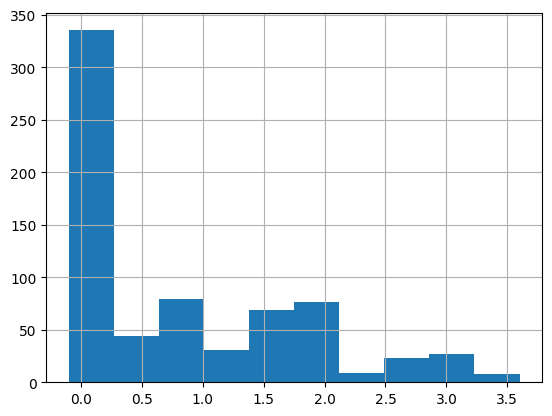

In [ ]:
df['Oldpeak'].hist()

<Axes: >

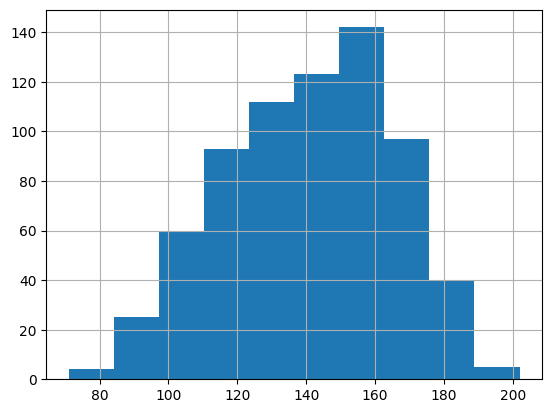

In [ ]:
df['MaxHR'].hist()

<Axes: >

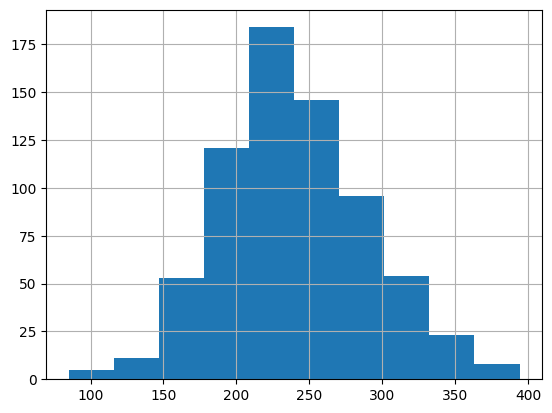

In [ ]:
df['Cholesterol'].hist()

<Axes: >

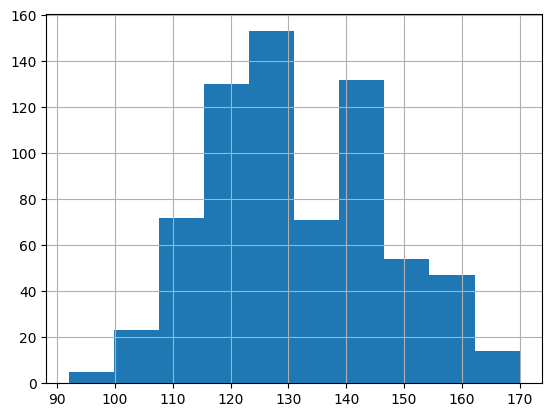

In [ ]:
df['RestingBP'].hist()

Comparison Visualation 

<Axes: title={'center': 'Sex Comparison by Heart Disease'}, xlabel='HeartDisease', ylabel='Sex'>

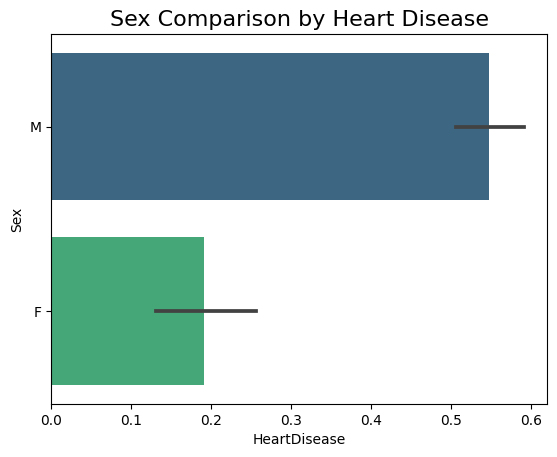

In [ ]:
plt.title("Sex Comparison by Heart Disease", fontsize=16)
sns.barplot(x = 'HeartDisease', y = 'Sex', data = df, palette = 'viridis')

<Axes: title={'center': 'ChestPainType Comparison by Heart Disease'}, xlabel='HeartDisease', ylabel='ChestPainType'>

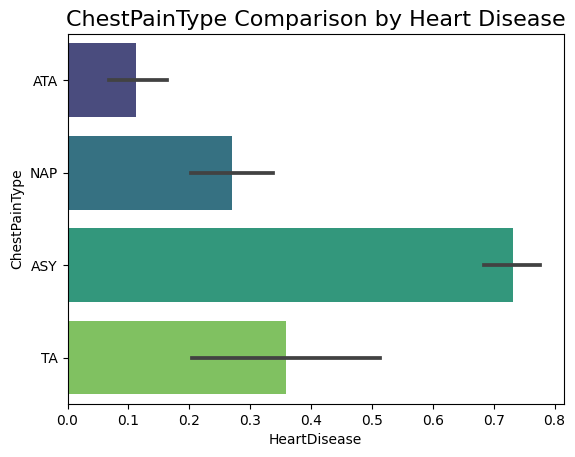

In [ ]:
plt.title("ChestPainType Comparison by Heart Disease", fontsize=16)
sns.barplot(x = 'HeartDisease', y = 'ChestPainType', data = df, palette = 'viridis')

<Axes: title={'center': 'RestingECG Comparison by Heart Disease'}, xlabel='HeartDisease', ylabel='RestingECG'>

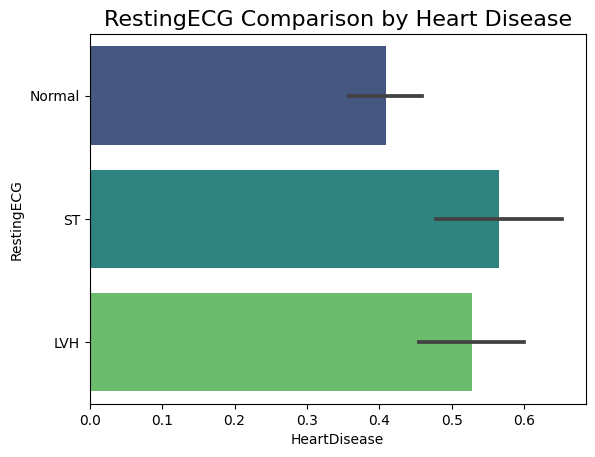

In [ ]:
plt.title("RestingECG Comparison by Heart Disease", fontsize=16)
sns.barplot(x = 'HeartDisease', y = 'RestingECG', data = df, palette = 'viridis')

<Axes: title={'center': 'ExerciseAngina Comparison by Heart Disease'}, xlabel='HeartDisease', ylabel='ExerciseAngina'>

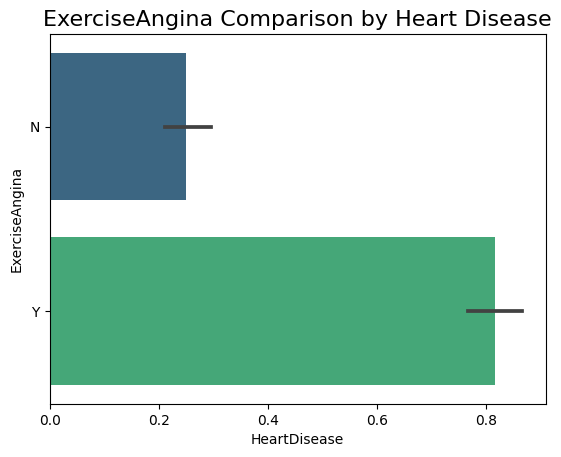

In [ ]:
plt.title("ExerciseAngina Comparison by Heart Disease", fontsize=16)
sns.barplot(x = 'HeartDisease', y = 'ExerciseAngina', data = df, palette = 'viridis')

<Axes: title={'center': 'Age Distribution by Heart Disease'}, xlabel='Age', ylabel='HeartDisease'>

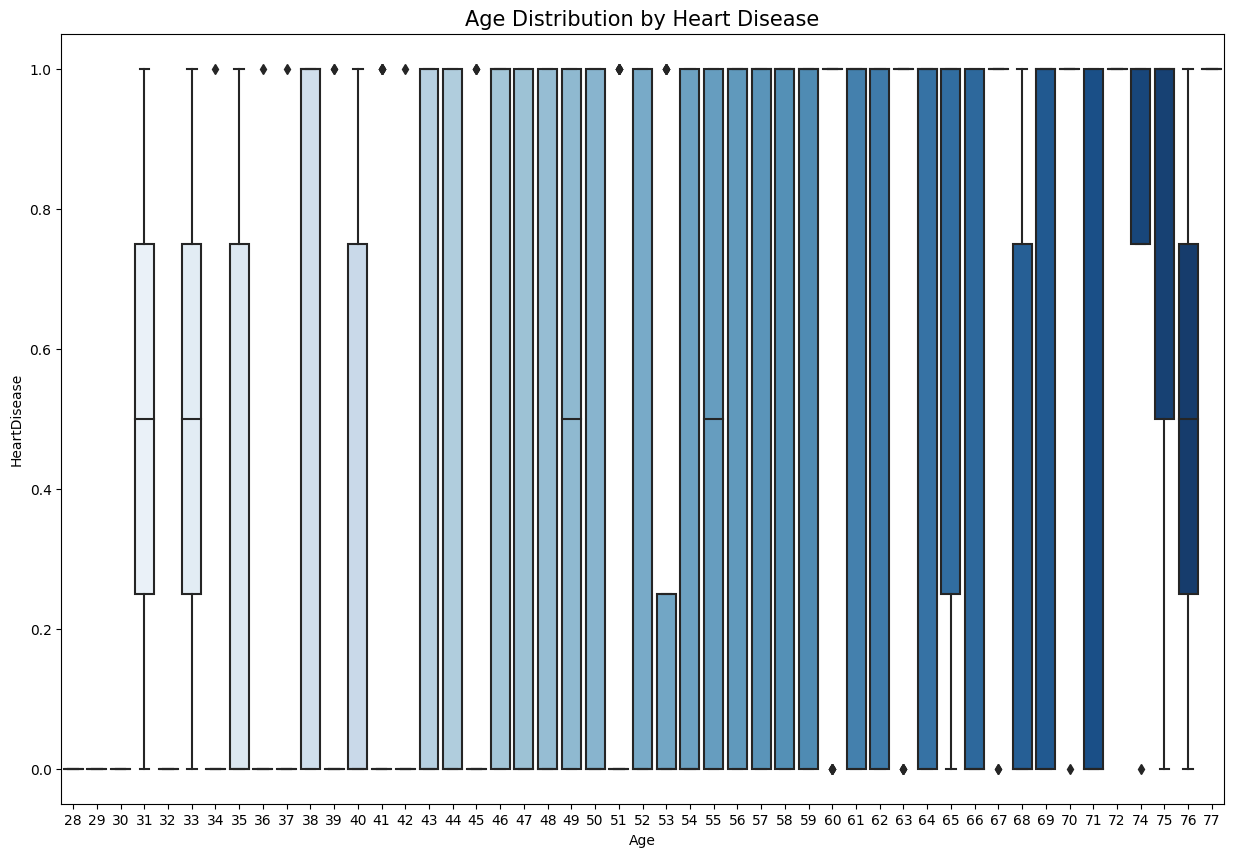

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Age Distribution by Heart Disease', fontsize = 15)
sns.boxplot(x = 'Age', y = 'HeartDisease', palette = 'Blues', data = df.query("Age > 0"))

Data Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[['Sex','ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope']] = oe.fit_transform(df[['Sex','ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope']])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1.0,3.0,110,264,0,1.0,132,0.0,1.2,1.0,1
914,68,1.0,0.0,144,193,1,1.0,141,0.0,3.4,1.0,1
915,57,1.0,0.0,130,131,0,1.0,115,1.0,1.2,1.0,1
916,57,0.0,1.0,130,236,0,0.0,174,0.0,0.0,1.0,1


In [ ]:
df.dtypes

Age                 int64
Sex               float64
ChestPainType     float64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG        float64
MaxHR               int64
ExerciseAngina    float64
Oldpeak           float64
ST_Slope          float64
HeartDisease        int64
dtype: object

Feature Importance

In [ ]:
#Feature Selection
x = df.drop('HeartDisease',axis='columns')
y = df['HeartDisease']

In [ ]:
x.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0


In [ ]:
y.head()


0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [ ]:
print(model.feature_importances_)

[0.07414925 0.05795717 0.11311185 0.0710249  0.06324359 0.01912795
 0.04064699 0.08744527 0.15859516 0.10353984 0.21115801]


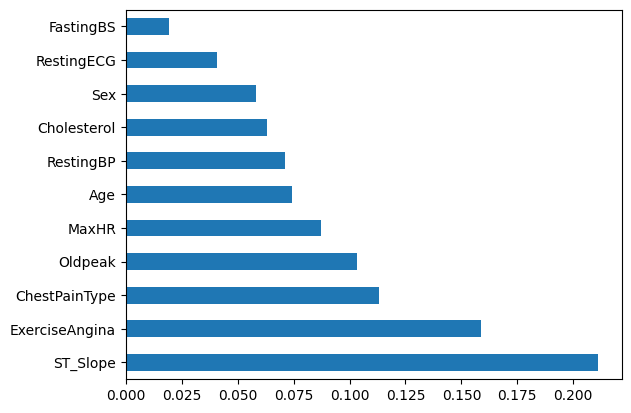

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [ ]:
data = df.drop('FastingBS',axis='columns')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,1.0,122,0.0,0.0,2.0,0


Heatmap

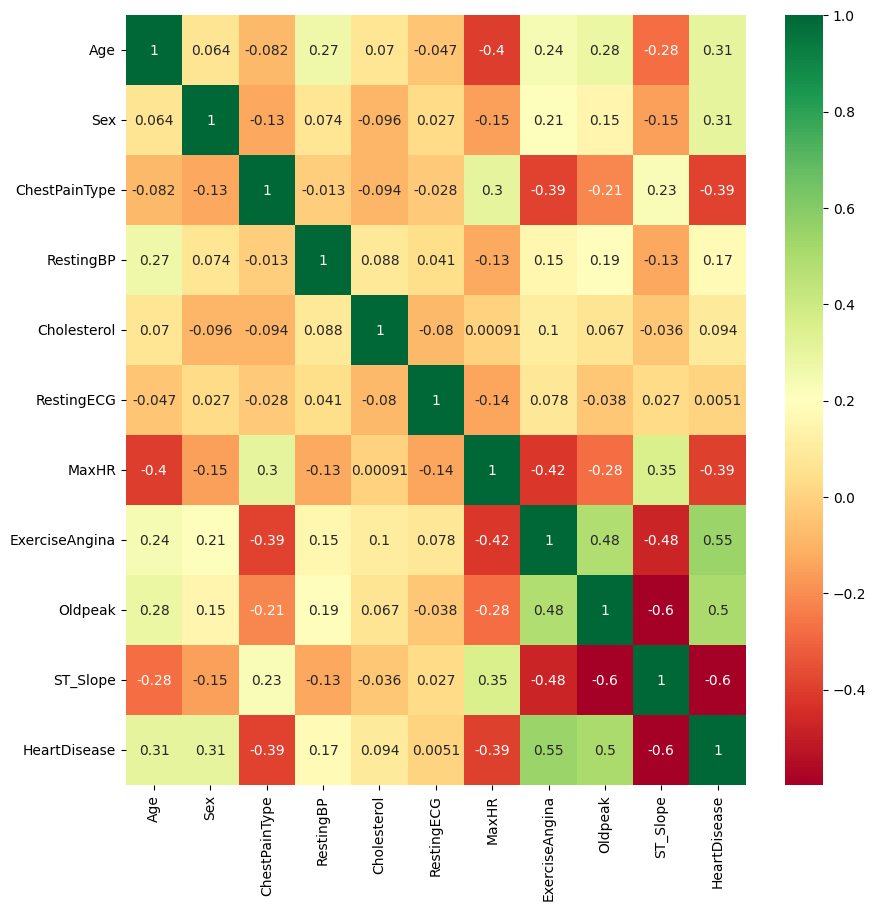

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# **Test/Train Split**

In [ ]:
x = data.drop(['HeartDisease'], axis = 1)
y = data['HeartDisease']

print(x.shape)
print(y.shape)

(701, 10)
(701,)


In [ ]:
#80/20 split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=23)
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)


(701, 10)
(560, 10)
(141, 10)
(701,)
(560,)
(141,)


Target Distribution

In [ ]:
print(df['HeartDisease'].value_counts())


0    377
1    324
Name: HeartDisease, dtype: int64


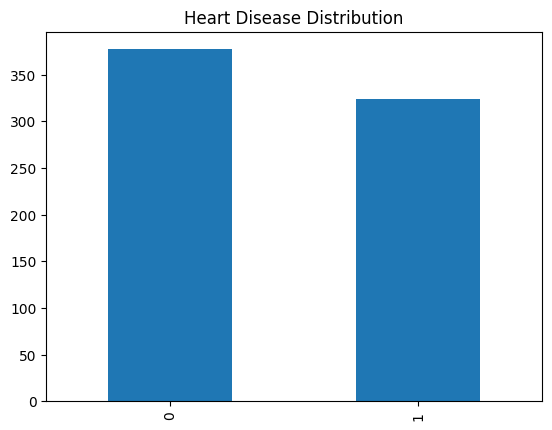

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

df['HeartDisease'].value_counts().plot.bar()
plt.title('Heart Disease Distribution')
plt.show()

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

lr_model = make_pipeline(StandardScaler(), LogisticRegression())

print(lr_model.fit(x_train, y_train))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])


In [ ]:
lr_y_pred = lr_model.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, lr_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8723404255319149


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_confusion_matrix = confusion_matrix(y_test, lr_y_pred)
print(lr_confusion_matrix)

[[65  9]
 [ 9 58]]


In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        74
           1       0.87      0.87      0.87        67

    accuracy                           0.87       141
   macro avg       0.87      0.87      0.87       141
weighted avg       0.87      0.87      0.87       141



In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
param_dist = dict(penalty = [None, 'l2'])

# Create a random forest classifier
lr = LogisticRegression(max_iter= 800)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(lr, 
                                 param_distributions = param_dist, 
                                 n_iter=2, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=800), n_iter=2,
                   param_distributions={'penalty': [None, 'l2']})

In [ ]:
# Create a variable for the best model
best_lr = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:', best_lr)

Best hyperparameters: LogisticRegression(max_iter=800)


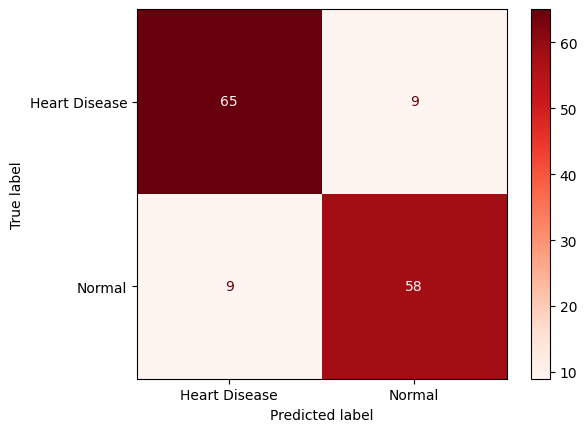

In [ ]:
#Evaluation Metrics

# Generate predictions with the best model
y_pred_1 = best_lr.predict(x_test)

# Create the confusion matrix
from sklearn.metrics import confusion_matrix
nb_confusion_matrix = confusion_matrix(y_test, y_pred_1)
labels = ["Heart Disease", "Normal"]

ConfusionMatrixDisplay(confusion_matrix=nb_confusion_matrix, display_labels=labels).plot(cmap='Reds');

In [ ]:
y_pred_1 = best_lr.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_1)
precision = precision_score(y_test, y_pred_1)
recall = recall_score(y_test, y_pred_1)
f1 = f1_score(y_test, y_pred_1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1-Score:", f1)

Accuracy: 0.8723404255319149
Precision: 0.8656716417910447
Recall: 0.8656716417910447
f1-Score: 0.8656716417910447


# **Naive Bayes**

In [ ]:
#Fit
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
print(nb_model.fit(x_train, y_train))

GaussianNB()


In [ ]:
#Prediction
nb_y_pred = nb_model.predict(x_test)

accuracy_1 = accuracy_score(y_test, nb_y_pred)
print("Accuracy:", accuracy_1)

Accuracy: 0.851063829787234


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_confusion_matrix = confusion_matrix(y_test, nb_y_pred)
print(nb_confusion_matrix)

[[64 10]
 [11 56]]


In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86        74
           1       0.85      0.84      0.84        67

    accuracy                           0.85       141
   macro avg       0.85      0.85      0.85       141
weighted avg       0.85      0.85      0.85       141



In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
param_dist = {#'n_estimators': randint(50,500),
             # 'max_depth': randint(1,20)
              #'priors': 
              'var_smoothing': np.logspace(0,-9, num=100)}
            

# Create a random forest classifier
nb = GaussianNB()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(nb, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=10)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=GaussianNB(), n_iter=5,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.5111917...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [ ]:
# Create a variable for the best model
best_nb = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:', best_nb)

Best hyperparameters: GaussianNB(var_smoothing=5.3366992312063123e-05)


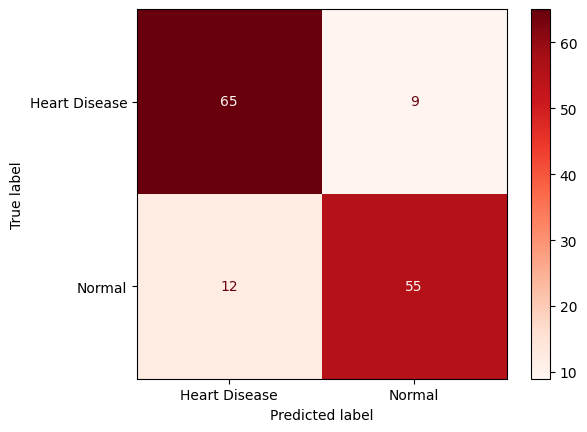

In [ ]:
#Evaluation Metrics

# Generate predictions with the best model
y_pred_2 = best_nb.predict(x_test)

# Create the confusion matrix
from sklearn.metrics import confusion_matrix
nb_confusion_matrix = confusion_matrix(y_test, y_pred_2)
labels = ["Heart Disease", "Normal"]

ConfusionMatrixDisplay(confusion_matrix=nb_confusion_matrix, display_labels=labels).plot(cmap='Reds');

In [ ]:
y_pred_2 = best_nb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_2)
precision = precision_score(y_test, y_pred_2)
recall = recall_score(y_test, y_pred_2)
f1 = f1_score(y_test, y_pred_2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1-Score:", f1)

Accuracy: 0.851063829787234
Precision: 0.859375
Recall: 0.8208955223880597
f1-Score: 0.8396946564885497


# **Random** **Forest**

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
#Fit
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
print(rf_model.fit(x_train, y_train))

RandomForestClassifier()


In [ ]:
#Prediction
rf_y_pred = rf_model.predict(x_test)

accuracy_2 = accuracy_score(y_test, rf_y_pred)
print("Accuracy:", accuracy_2)

Accuracy: 0.8865248226950354


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
rf_confusion_matrix = confusion_matrix(y_test, rf_y_pred)
print(rf_confusion_matrix)

[[66  8]
 [ 8 59]]


In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_y_pred))

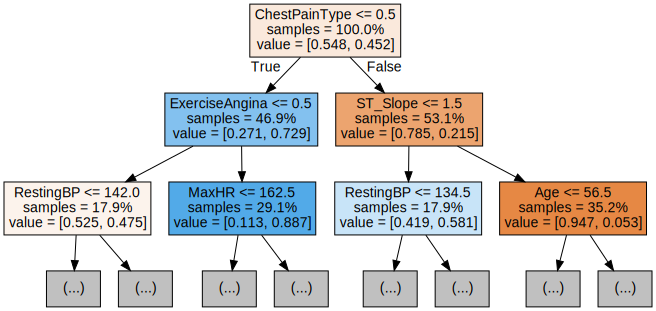

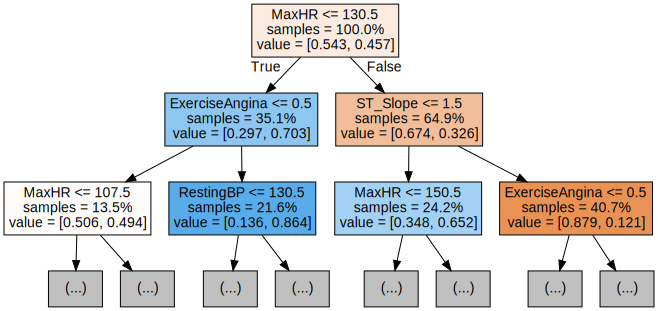

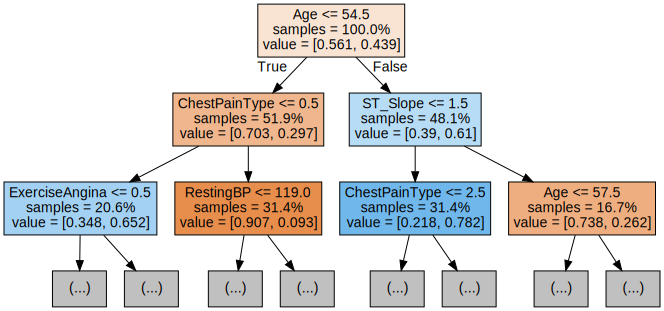

In [ ]:
#Visual
for i in range(3):
    tree = rf_model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
#Hyperparameter Tuning

param_dist = {
        'bootstrap': [False],
        'max_depth': [6,8,12],
        'max_features': ['sqrt'],
        'min_samples_leaf': [2,4, 5],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 500, 1000]
        }

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'bootstrap': [False],
                                        'max_depth': [6, 8, 12],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [2, 4, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 500, 1000]})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  best_rf)

Best hyperparameters: RandomForestClassifier(bootstrap=False, max_depth=12, min_samples_leaf=2,
                       n_estimators=1000)


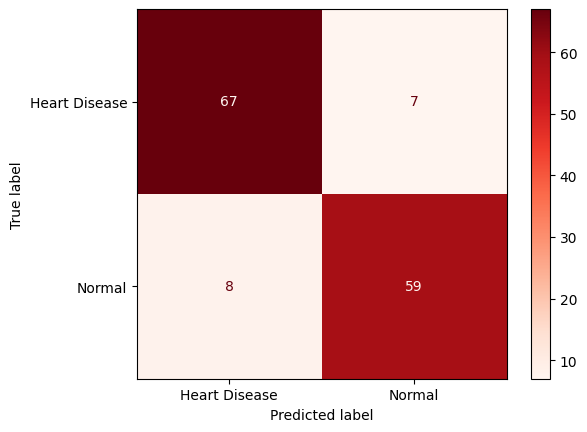

In [ ]:
#Evaluation Metrics

# Generate predictions with the best model
y_pred_3 = best_rf.predict(x_test)

# Create the confusion matrix
rf_confusion_matrix = confusion_matrix(y_test, y_pred_3)
labels = ["Heart Disease", "Normal"]

ConfusionMatrixDisplay(confusion_matrix=rf_confusion_matrix, display_labels=labels).plot(cmap='Reds');

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
y_pred_3 = best_rf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_3)
precision = precision_score(y_test, y_pred_3)
recall = recall_score(y_test, y_pred_3)
f1 = f1_score(y_test, y_pred_3)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1-Score:", f1)

Accuracy: 0.8936170212765957
Precision: 0.8939393939393939
Recall: 0.8805970149253731
f1-Score: 0.887218045112782


# **kNearest Neighbour**

In [ ]:
#Fit
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier() #(n_neighbors=4)
print(knn_model.fit(x_train, y_train))

KNeighborsClassifier()


In [ ]:
#Prediction
knn_y_pred = knn_model.predict(x_test)

accuracy = accuracy_score(y_test, knn_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_test, knn_y_pred)
print(knn_confusion_matrix)

[[51 23]
 [24 43]]


In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68        74
           1       0.65      0.64      0.65        67

    accuracy                           0.67       141
   macro avg       0.67      0.67      0.67       141
weighted avg       0.67      0.67      0.67       141



In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'n_neighbors' : [5,10,15,29,38,40],
               'weights' : ['uniform','distance']}
            

# Create a random forest classifier
knn = KNeighborsClassifier()
# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(knn, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5,
                   param_distributions={'n_neighbors': [5, 10, 15, 29, 38, 40],
                                        'weights': ['uniform', 'distance']})

In [ ]:
# Create a variable for the best model
best_knn = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  best_knn)

Best hyperparameters: KNeighborsClassifier(n_neighbors=40, weights='distance')


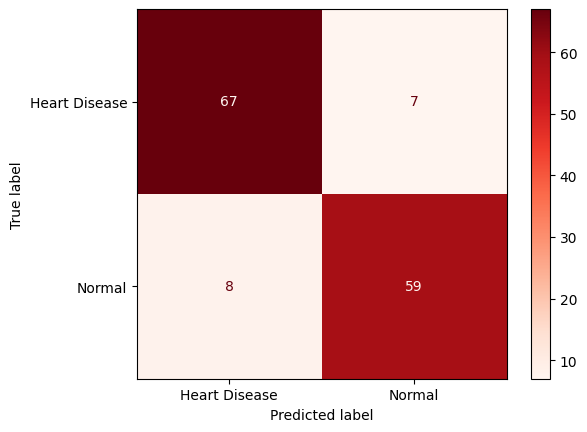

In [ ]:
#Evaluation Metrics

# Generate predictions with the best model
y_pred_4 = best_rf.predict(x_test)

# Create the confusion matrix
knn_confusion_matrix = confusion_matrix(y_test, y_pred_4)
labels = ["Heart Disease", "Normal"]

ConfusionMatrixDisplay(confusion_matrix=rf_confusion_matrix, display_labels=labels).plot(cmap='Reds');

In [ ]:
y_pred_4 = best_knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_4)
precision = precision_score(y_test, y_pred_4)
recall = recall_score(y_test, y_pred_4)
f1 = f1_score(y_test, y_pred_4)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1-Score:", f1)

Accuracy: 0.6453900709219859
Precision: 0.6307692307692307
Recall: 0.6119402985074627
f1-Score: 0.6212121212121212


In [ ]:
#Cross Validation

k_values = [i for i in range (1,60)]
scores = []
#from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(X)
#scaler = StandardScaler()
#X = StandardScaler().fit_transform(X)
#X = scaler.fit_transform(x)

from sklearn.model_selection import cross_val_score

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

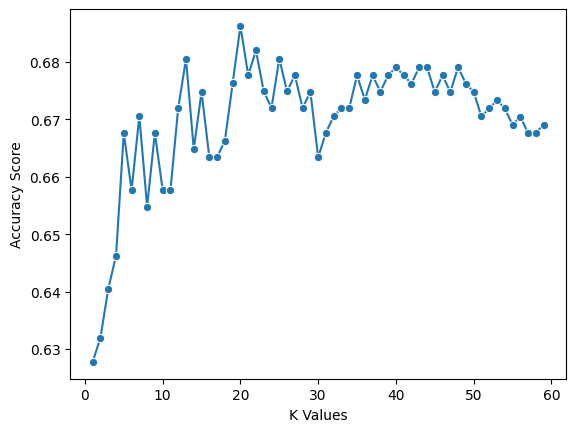

In [ ]:
import seaborn as sns
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
#Evaluation Matrix
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

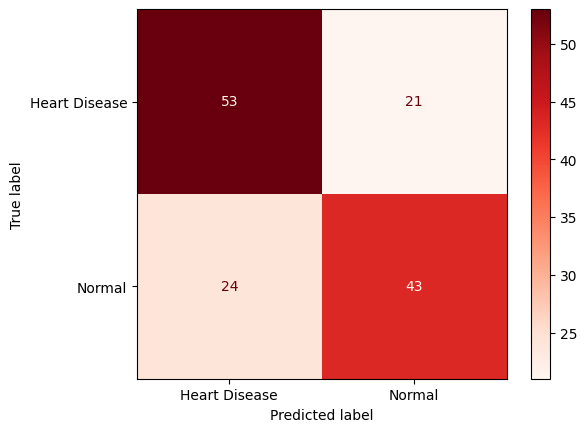

In [ ]:
#Generate predictions with the best model
y_pred_4 = knn.predict(x_test)

# Create the confusion matrix
knn_confusion_matrix = confusion_matrix(y_test, y_pred_4)
labels = ["Heart Disease", "Normal"]

ConfusionMatrixDisplay(confusion_matrix=knn_confusion_matrix, display_labels=labels).plot(cmap='Reds');

In [ ]:
y_pred_4 = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_4)
precision = precision_score(y_test, y_pred_4)
recall = recall_score(y_test, y_pred_4)
f1 = f1_score(y_test, y_pred_4)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1-Score:", f1)

Accuracy: 0.6808510638297872
Precision: 0.671875
Recall: 0.6417910447761194
f1-Score: 0.6564885496183207


# **XGBoost**

In [ ]:
#Fit
from xgboost import XGBClassifier
xgb_model = XGBClassifier( eval_metric='mlogloss')
print(xgb_model.fit(x_train, y_train))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)


In [ ]:
#Prediction
xgb_y_pred = xgb_model.predict(x_test)

accuracy = accuracy_score(y_test, xgb_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8794326241134752


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
xgb_confusion_matrix = confusion_matrix(y_test, xgb_y_pred)
print(xgb_confusion_matrix)

[[66  8]
 [ 9 58]]


In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89        74
           1       0.88      0.87      0.87        67

    accuracy                           0.88       141
   macro avg       0.88      0.88      0.88       141
weighted avg       0.88      0.88      0.88       141



In [ ]:
#Hyperparameter Tuning
import scipy.stats as stats

param_dist = {
            'max_depth': stats.randint(3, 10),
            'learning_rate': stats.uniform(0.01, 0.1),
            'subsample': stats.uniform(0.5, 0.5),
            'n_estimators':stats.randint(75, 200)
            }

# Create a random forest classifier
xgb = XGBClassifier()

# Use random search to find the best hyperparameters
#random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy'
rand_search = RandomizedSearchCV(xgb, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fb1d1a785e0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb1d19adc70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb1d198dcd0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fb1d19ada30>})

In [ ]:
# Create a variable for the best model
best_xgb = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'learning_rate': 0.08183114781604069, 'max_depth': 3, 'n_estimators': 148, 'subsample': 0.5855438108762769}


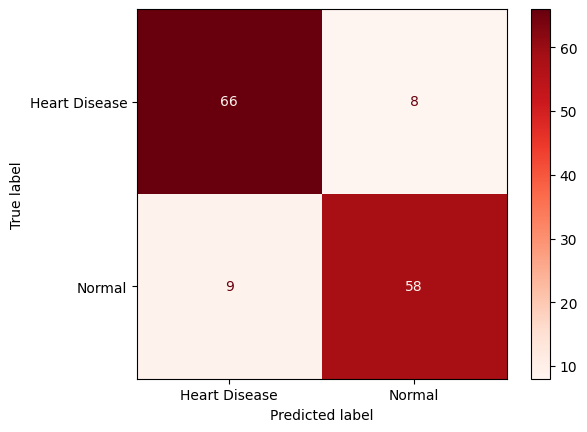

In [ ]:
#Evaluation Metrics

# Generate predictions with the best model
y_pred_5 = best_xgb.predict(x_test)

# Create the confusion matrix
xgb__confusion_matrix = confusion_matrix(y_test, y_pred_5)
labels = ["Heart Disease", "Normal"]

ConfusionMatrixDisplay(confusion_matrix=xgb_confusion_matrix, display_labels=labels).plot(cmap='Reds');

In [ ]:
y_pred_5 = best_xgb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_5)
precision = precision_score(y_test, y_pred_5)
recall = recall_score(y_test, y_pred_5)
f1 = f1_score(y_test, y_pred_5)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1-Score:", f1)

Accuracy: 0.8865248226950354
Precision: 0.8805970149253731
Recall: 0.8805970149253731
f1-Score: 0.8805970149253731
